# 1. DATA CLEANING

In [1]:
# Importing the necessary libraries to clean the data.

import pandas as pd 
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from functools import reduce

In order to make the dataframes easier and quicker to recall, we opted for this naming convention:
- CAS - 2021 Casualty Dataset
- ACC - 2021 Accident Dataset
- VEH - 2021 Vehicle Dataset

## VEHICLE DATA

### A. CLEANING THE COLUMNS

In [2]:
VEH_DF= pd.read_csv('vehicle-dft-road-casualty-statistics-2021.csv')
VEH_DF

C:\Users\User\AppData\Local\Temp\ipykernel_1172\691148562.py:1: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  VEH_DF= pd.read_csv('vehicle-dft-road-casualty-statistics-2021.csv')


,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,2021010000000.0,2021,10287148,1,9,0,17,1,5,0,...,1,19,4,999,1,3,VOLKSWAGEN GOLF,10,1,E01023551
1,2021010000000.0,2021,10287148,2,9,0,2,0,0,0,...,3,-1,-1,1499,1,2,BMW 1 SERIES,-1,-1,-1
2,2021010000000.0,2021,10287148,3,9,0,2,0,0,0,...,3,-1,-1,-1,3,1,SMART FORTWO,-1,-1,-1
3,2021010000000.0,2021,10287149,1,9,0,18,3,7,0,...,1,32,6,2967,2,11,AUDI Q7,-1,-1,-1
4,2021010000000.0,2021,10287149,2,9,0,18,5,1,0,...,1,21,5,1598,1,11,VAUXHALL ASTRA,3,1,E01004202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186438,2.02199E+12,2021,991196607,2,9,0,18,1,5,0,...,1,61,9,-1,-1,-1,-1,9,2,-1
186439,2.02199E+12,2021,991197944,1,9,0,18,3,7,0,...,2,51,8,-1,-1,-1,-1,5,3,-1
186440,2.02199E+12,2021,991200639,1,9,0,18,4,8,0,...,2,24,5,-1,-1,-1,-1,4,1,-1
186441,2.02199E+12,2021,991201030,1,9,0,18,2,6,0,...,1,28,6,-1,-1,-1,-1,5,2,-1


As we can see above, the data has a lot of rows and columns. Let's see what they are and if we can get rid of redundant, duplicate or unnecessary data.

In [ ]:
VEH_DF.info()

From the above, we can tell the following columns will not be necessary for our dataset:

- accident_year
- towing_and_articulation
- vehicle manouvre 
- vehicle_direction_from
- vehicle_direction_to
- vehicle_location_restricted_lane
- skidding_and_overturning
- hit_object_in_carriageway
- vehicle_leaving_carriageway
- hit_object_off_carriageway
- first_point_of_impact
- vehicle_left_hand_drive
- driver_imd_decile
- driver_home_area_type
- lsoa_of_driver

 Therefore, we can remove them. This will leave us with 13 columns left from 28.

In [3]:
VEH_DF = VEH_DF.drop(columns=['accident_year','towing_and_articulation', 'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle_direction_to', 
                        'vehicle_location_restricted_lane', 'skidding_and_overturning', 'hit_object_in_carriageway', 'vehicle_leaving_carriageway', 
                        'hit_object_off_carriageway', 'first_point_of_impact', 'vehicle_left_hand_drive', 'driver_imd_decile', 'driver_home_area_type', 'lsoa_of_driver'])

VEH_DF

,accident_index,accident_reference,vehicle_reference,vehicle_type,junction_location,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model
0,2021010000000.0,10287148,1,9,1,6,1,19,4,999,1,3,VOLKSWAGEN GOLF
1,2021010000000.0,10287148,2,9,1,6,3,-1,-1,1499,1,2,BMW 1 SERIES
2,2021010000000.0,10287148,3,9,1,6,3,-1,-1,-1,3,1,SMART FORTWO
3,2021010000000.0,10287149,1,9,8,6,1,32,6,2967,2,11,AUDI Q7
4,2021010000000.0,10287149,2,9,1,6,1,21,5,1598,1,11,VAUXHALL ASTRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186438,2.02199E+12,991196607,2,9,0,6,1,61,9,-1,-1,-1,-1
186439,2.02199E+12,991197944,1,9,2,5,2,51,8,-1,-1,-1,-1
186440,2.02199E+12,991200639,1,9,8,6,2,24,5,-1,-1,-1,-1
186441,2.02199E+12,991201030,1,9,0,6,1,28,6,-1,-1,-1,-1


Now, we should look at how much data with missing values we have. There are 186,443 rows!

In [119]:
# Checking how many NaN values each column contains.

missing_val= VEH_DF.isnull().sum().sort_values(ascending=False)
percent_missing = ((missing_val/VEH_DF.isnull().count())*100).sort_values(ascending=False)
missing_df = pd.concat([missing_val,percent_missing], axis=1, keys=['Total', '%'],sort=False)
missing_df[missing_df['Total']>=1]

,Total,%


In [ ]:
#visualizing columns with missing value
VEH_DF.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

No missing values, amazing! What about duplicates? Let's check.

In [4]:
n_duplicates =VEH_DF.drop(labels=["accident_index"], axis=1).duplicated().sum()
print(f"You might have {n_duplicates} duplicates in your database.")

You might have 0 duplicates in your database.


Now, we need to deal with the 'unknown' values in our dataset, as they don't tell us much about the data's story. Therefore, we have no use for them. These are the negative values.
The columns picked up in the histogram are the columns with an int64 datatype.

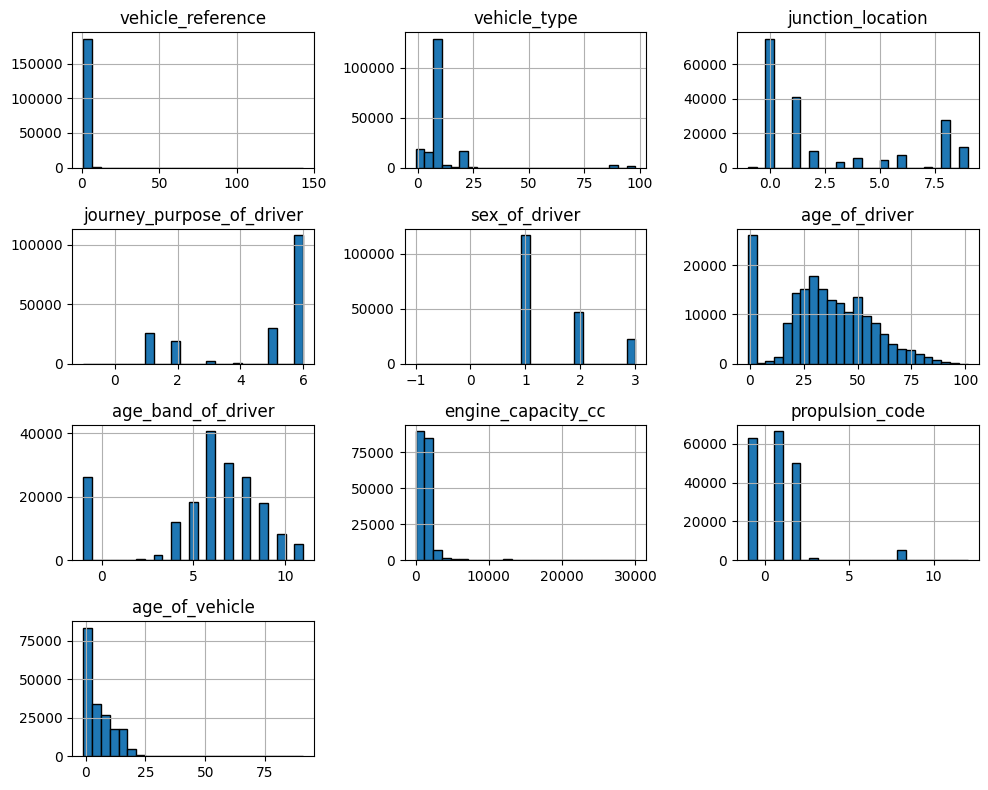

In [10]:
VEH_DF.hist(bins=25, figsize=(10, 8), edgecolor= 'black')
plt.tight_layout();

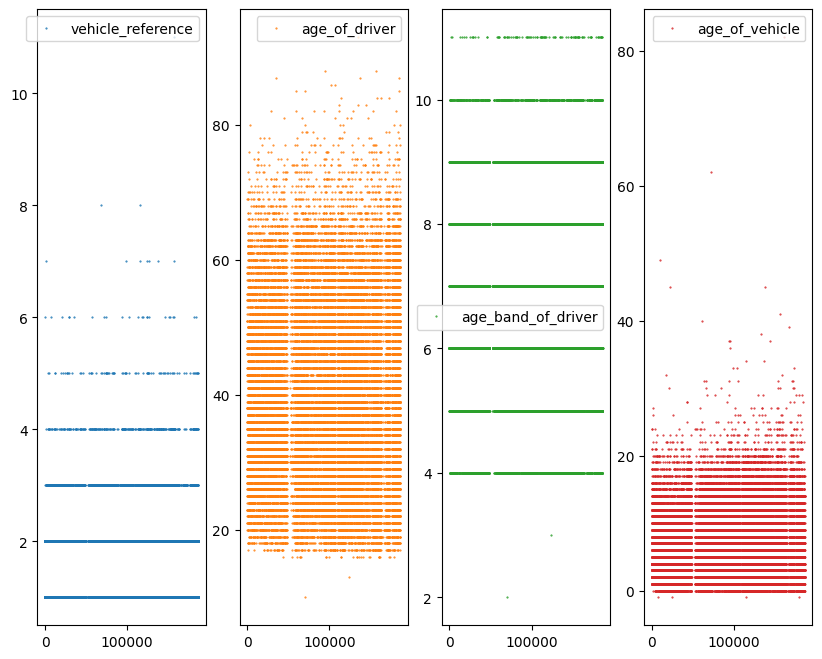

In [49]:
VEH_DF.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
        figsize=(10, 8), markersize=1);

In [ ]:
VEH_DF.head(5)

In [137]:
# Checking what's inside each column again to know exactly what we want to delete next 
# based on the missing values or unknown data.

#VEH_DF.vehicle_type.value_counts()
# -1 = 51 missing data
# 90 = 2382 other data
# 23 = 2 electric motorcycle
# 10 = 55 minibus
# 17 = 135 agricultural vehicle

#VEH_DF.junction_location.value_counts()
# -1 = 504 missing data
# 9 = 11897 unknown (self-reported)
# 7 = entering from slip road

#VEH_DF.journey_purpose_of_driver.value_counts()
# -1 = 3 missing data
# 5 = 30120 other
# 6 = 107992 not known


#VEH_DF.sex_of_driver.value_counts()
# 3 = 22570 not known
# -1 = 2 missing data

#VEH_DF.age_of_driver.value_counts()
# -1 = 26094 missing data

#VEH_DF.age_band_of_driver.value_counts()
# -1 = 26094 missing data

#VEH_DF.engine_capacity_cc.value_counts()
# -1 = 64199 missing data

#VEH_DF.propulsion_code.value_counts()
# -1 = 62978 undefined

#VEH_DF.age_of_vehicle.value_counts()
# -1 = 63035 missing data

#VEH_DF.generic_make_model.value_counts()
# -1 = 66775 missing data

Car                                       11063
Van (< 3.5T)                               3254
Bus or coach                               1400
Motorcycle (50 CC > N < 125 CC)            1222
Goods vehicle over 7.5T                    1069
Taxi/Private hire car                       872
Motorcycle (<50 CC)                         242
Motorcycle (125 CC > N < 500 CC)            215
Goods vehicle over 3.5T and under 7.5T      194
Motorcycle (500 CC>)                        119
Minibus                                      55
Agricultural vehicle                         38
Electric motorcycle                           2
Name: vehicle_type, dtype: int64

The code above has the commented negative values that we do not want in our dataset. 
Remove the hashtag and you can see the counts for each one of them.

From the above, we know we need to delete rows. Therefore we deleted all rows with the negative values. This puts our total to 29953 rows!

In [5]:
VEH_DF = VEH_DF[VEH_DF.age_of_driver !=  -1]

VEH_DF = VEH_DF[VEH_DF.engine_capacity_cc !=  -1]

VEH_DF = VEH_DF[VEH_DF.generic_make_model !=  -1]


In [6]:
dv = [-1, 3]
VEH_DF = VEH_DF[VEH_DF.sex_of_driver.isin(dv) ==  False]

In [7]:
dv = [-1, 5, 6]
VEH_DF = VEH_DF[VEH_DF.journey_purpose_of_driver.isin(dv) ==  False]

In [8]:
dv = [-1, 90, 99, 103, 104, 105, 106, 108, 109, 110, 113]
VEH_DF = VEH_DF[VEH_DF.vehicle_type.isin(dv) ==  False]

In [9]:
dv = [-1, 9]
VEH_DF = VEH_DF[VEH_DF.junction_location.isin(dv) ==  False]

In [ ]:
VEH_DF

While we removed all the negative values, we should further reduce the dataframe. It is already quite big!
We should remove all rows with a value count less than 100.

In [10]:
counts = VEH_DF['junction_location'].value_counts()

remove = counts[counts <= 100].index
VEH_DF = VEH_DF[~VEH_DF.junction_location.isin(remove)]

In [11]:
counts = VEH_DF['propulsion_code'].value_counts()

remove = counts[counts <= 100].index
VEH_DF = VEH_DF[~VEH_DF.propulsion_code.isin(remove)]

In [12]:
counts = VEH_DF['generic_make_model'].value_counts()

remove = counts[counts <= 100].index
VEH_DF = VEH_DF[~VEH_DF.generic_make_model.isin(remove)]

In [13]:
counts = VEH_DF['age_of_vehicle'].value_counts()

remove = counts[counts <= 100].index
VEH_DF = VEH_DF[~VEH_DF.age_of_vehicle.isin(remove)]

In [14]:
counts = VEH_DF['journey_purpose_of_driver'].value_counts()

remove = counts[counts <= 100].index
VEH_DF = VEH_DF[~VEH_DF.journey_purpose_of_driver.isin(remove)]

In [15]:
counts = VEH_DF['vehicle_type'].value_counts()

remove = counts[counts <= 100].index
VEH_DF = VEH_DF[~VEH_DF.vehicle_type.isin(remove)]

In [139]:
VEH_DF

,accident_index,accident_reference,vehicle_reference,vehicle_type,junction_location,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model
5,2021010000000.0,10287151,1,Car,Cleared junction or waiting/parked at junction...,Journey as part of work,Male,27,6,Medium engine CC,Hybrid electric,4,BMW 5 SERIES
17,2021010000000.0,10287168,2,Bus or coach,Approaching junction or waiting/parked at junc...,Journey as part of work,Male,53,8,Large engine CC,Heavy oil,9,ALEXANDER DENNIS MODEL MISSING
40,2021010000000.0,10287239,1,Car,Approaching junction or waiting/parked at junc...,Journey as part of work,Male,35,6,Large engine CC,Heavy oil,4,BMW X5
50,2021010000000.0,10287252,2,Van (< 3.5T),Approaching junction or waiting/parked at junc...,Journey as part of work,Male,24,5,Large engine CC,Heavy oil,7,MERCEDES SPRINTER
52,2021010000000.0,10287259,2,Motorcycle (50 CC > N < 125 CC),Approaching junction or waiting/parked at junc...,Journey as part of work,Male,32,6,Small engine CC,Petrol,4,YAMAHA GPD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186342,2.02199E+12,991147999,1,Van (< 3.5T),Leaving roundabout,Journey as part of work,Male,26,6,Large engine CC,Heavy oil,2,MERCEDES SPRINTER
186354,2.02199E+12,991149838,1,Car,Not at or within 20 metres of junction,Work commute,Male,25,5,Small engine CC,Petrol,14,FORD FIESTA
186357,2.02199E+12,991150420,1,Taxi/Private hire car,Cleared junction or waiting/parked at junction...,Journey as part of work,Male,37,7,Small engine CC,Heavy oil,3,-1
186372,2.02199E+12,991160850,1,Van (< 3.5T),Not at or within 20 metres of junction,Journey as part of work,Male,35,6,Large engine CC,Heavy oil,9,MERCEDES SPRINTER


### B. RENAMING VARIABLES

Now that we have our data cleaned, we should change the numbers in the columns to something more understandable by a human. We shouldn't depend on continuously checking the codes to know what it means.

Therefore, we also need to change the column data type.

In [16]:
# Vehicle type
def vehicle_type_func(vehicle):
    if vehicle == 1:
        return "Pedal cycle"
    if vehicle == 2:
        return "Motorcycle (<50 CC)"
    if vehicle == 3:
        return "Motorcycle (50 CC > N < 125 CC)"
    if vehicle == 4:
        return "Motorcycle (125 CC > N < 500 CC)"
    if vehicle == 5:
        return "Motorcycle (500 CC>)"
    if vehicle == 8:
        return "Taxi/Private hire car"
    if vehicle == 9:
        return "Car"
    if vehicle == 10:
        return "Minibus"
    if vehicle == 11:
        return "Bus or coach"
    if vehicle == 16:
        return "Ridden horse"
    if vehicle == 17:
        return "Agricultural vehicle"
    if vehicle == 18:
        return "Tram"
    if vehicle == 19:
        return "Van (< 3.5T)"
    if vehicle == 20:
        return "Goods vehicle over 3.5T and under 7.5T"
    if vehicle == 21:
        return "Goods vehicle over 7.5T"
    if vehicle == 22:
        return "Mobility scooter"
    if vehicle == 23:
        return "Electric motorcycle"
    if vehicle == 90:
        return "Other vehicle"
    if vehicle == 97:
        return "Motorcycle - unknown CC"
    if vehicle == 22:
        return "Goods vehicle - unknown weight"
    if vehicle == 23:
        return "Electric motorcycle"
    else:
        return "Unknown"


VEH_DF['vehicle_type'] = VEH_DF['vehicle_type'].apply(vehicle_type_func)

In [17]:
#Junction location
def junction_location_func(location):
    if location == 0:
        return "Not at or within 20 metres of junction"
    if location == 1:
        return "Approaching junction or waiting/parked at junction approach"
    if location == 2:
        return "Cleared junction or waiting/parked at junction exit"
    if location == 3:
        return "Leaving roundabout"
    if location == 4:
        return "Entering roundabout"
    if location == 5:
        return "Leaving main road"
    if location == 6:
        return "Entering main road"
    if location == 7:
        return "Entering from slip road"
    if location == 8:
        return "Mid Junction - on roundabout or on main road"
    else:
        return "Unknown"


VEH_DF['junction_location'] = VEH_DF['junction_location'].apply(junction_location_func)

In [18]:
# Purpose of journey
def journey_purpose(purpose):
    if purpose == 1:
        return "Journey as part of work"
    if purpose == 2:
        return "Work commute"
    if purpose == 3:
        return "Taking pupil to/from school"
    if purpose == 4:
        return "Pupil riding to/from school"
    else:
        return "Unknown"


VEH_DF['journey_purpose_of_driver'] = VEH_DF['journey_purpose_of_driver'].apply(journey_purpose)

In [19]:
# Sex of driver

def driver_sex(gender):
    if gender == 1:
        return "Male"
    if gender == 2:
        return "Female"
    else:
        return "Unknown"


VEH_DF['sex_of_driver'] = VEH_DF['sex_of_driver'].apply(driver_sex)

In [20]:
# Engine CC

def enginecap(eng_cc):
    if eng_cc <=1500:
        return "Small engine CC"
    if eng_cc >1500 and eng_cc <=2000:
        return "Medium engine CC"
    if eng_cc >2000:
        return "Large engine CC"


VEH_DF['engine_capacity_cc'] = VEH_DF['engine_capacity_cc'].apply(enginecap)


In [21]:
# Propulsion code
def propulsion_code_func(code):
    if code == 1:
        return "Petrol"
    if code == 2:
        return "Heavy oil"
    if code == 3:
        return "Electric"
    if code == 4:
        return "Steam"
    if code == 5:
        return "Gas"
    if code == 6:
        return "Petrol/Gas (LPG)"
    if code == 7:
        return "Gas/Bi-fuel"
    if code == 8:
        return "Hybrid electric"
    if code == 9:
        return "Gas diesel"
    if code == 10:
        return "New fuel technology"
    if code == 11:
        return "Fuel cells"
    if code == 12:
        return "Electric diesel"
    else:
        return "Unknown"


VEH_DF['propulsion_code'] = VEH_DF['propulsion_code'].apply(propulsion_code_func)

In [ ]:
VEH_DF

With the new data cleaned, we should make sure that the columns are the correct data type.

In [21]:
VEH_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 5 to 186390
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   accident_index             29953 non-null  object
 1   accident_reference         29953 non-null  object
 2   vehicle_reference          29953 non-null  int64 
 3   vehicle_type               29953 non-null  object
 4   junction_location          29953 non-null  object
 5   journey_purpose_of_driver  29953 non-null  object
 6   sex_of_driver              29953 non-null  object
 7   age_of_driver              29953 non-null  int64 
 8   age_band_of_driver         29953 non-null  int64 
 9   engine_capacity_cc         29953 non-null  object
 10  propulsion_code            29953 non-null  object
 11  age_of_vehicle             29953 non-null  int64 
 12  generic_make_model         29953 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [22]:
VEH_DF.to_csv('vehicle_cleaned_data.csv',index=False)

In [39]:
VEH_DF.to_excel('vehicle_cleaned_data.xlsx')

## CASUALTY DATA

The data cleaning process was explained in detail above, therefore the next two dataset cleans will have less markdowns and more comments.

In [3]:
import pandas as pd
CAS_DF= pd.read_csv('casualty-dft-road-casualty-statistics-2021.csv')
CAS_DF

C:\Users\User\AppData\Local\Temp\ipykernel_12624\1318725657.py:2: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  CAS_DF= pd.read_csv('casualty-dft-road-casualty-statistics-2021.csv')


,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,2021010000000.0,2021,10287148,1,1,1,1,19,4,3,0,0,0,0,0,9,1,10,E01023551
1,2021010000000.0,2021,10287149,1,1,2,1,25,5,3,0,0,1,0,0,9,1,5,E01003955
2,2021010000000.0,2021,10287149,2,2,1,1,21,5,3,0,0,0,0,0,9,1,3,E01004202
3,2021010000000.0,2021,10287149,2,3,2,1,17,4,2,0,0,1,0,0,9,1,2,E01004295
4,2021010000000.0,2021,10287151,1,1,1,1,27,6,3,0,0,0,0,0,9,1,2,E01002056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128204,2.02199E+12,2021,991196607,1,1,1,1,38,7,3,0,0,0,0,0,9,2,5,-1
128205,2.02199E+12,2021,991196607,2,2,1,1,61,9,3,0,0,0,0,0,9,2,9,-1
128206,2.02199E+12,2021,991197944,1,1,2,2,11,3,3,0,0,2,0,0,9,3,5,-1
128207,2.02199E+12,2021,991200639,1,1,3,2,34,6,3,1,3,0,0,0,0,1,1,-1


In [4]:
CAS_DF.casualty_severity.value_counts()

3    103288
2     23363
1      1558
Name: casualty_severity, dtype: int64

In [41]:
CAS_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128209 entries, 0 to 128208
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   accident_index                      128209 non-null  object
 1   accident_year                       128209 non-null  int64 
 2   accident_reference                  128209 non-null  object
 3   vehicle_reference                   128209 non-null  int64 
 4   casualty_reference                  128209 non-null  int64 
 5   casualty_class                      128209 non-null  int64 
 6   sex_of_casualty                     128209 non-null  int64 
 7   age_of_casualty                     128209 non-null  int64 
 8   age_band_of_casualty                128209 non-null  int64 
 9   casualty_severity                   128209 non-null  int64 
 10  pedestrian_location                 128209 non-null  int64 
 11  pedestrian_movement                 128

In [24]:
CAS_DF = CAS_DF.drop(columns=['pedestrian_location', 'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger',
                        'pedestrian_road_maintenance_worker','casualty_type','casualty_imd_decile', 'casualty_home_area_type'])
CAS_DF

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,lsoa_of_casualty
0,2021010000000.0,2021,10287148,1,1,1,1,19,4,3,E01023551
1,2021010000000.0,2021,10287149,1,1,2,1,25,5,3,E01003955
2,2021010000000.0,2021,10287149,2,2,1,1,21,5,3,E01004202
3,2021010000000.0,2021,10287149,2,3,2,1,17,4,2,E01004295
4,2021010000000.0,2021,10287151,1,1,1,1,27,6,3,E01002056
...,...,...,...,...,...,...,...,...,...,...,...
128204,2.02199E+12,2021,991196607,1,1,1,1,38,7,3,-1
128205,2.02199E+12,2021,991196607,2,2,1,1,61,9,3,-1
128206,2.02199E+12,2021,991197944,1,1,2,2,11,3,3,-1
128207,2.02199E+12,2021,991200639,1,1,3,2,34,6,3,-1


In [25]:
# Checking how many NaN values each column contains.

missing_val2= CAS_DF.isnull().sum().sort_values(ascending=False)
percent_missing2 = ((missing_val2/CAS_DF.isnull().count())*100).sort_values(ascending=False)
missing_df2 = pd.concat([missing_val2,percent_missing2], axis=1, keys=['Total', '%'],sort=False)
missing_df2[missing_df2['Total']>=1]

,Total,%


In [26]:
n_duplicates2 =CAS_DF.drop(labels=["accident_index"], axis=1).duplicated().sum()
print(f"You might have {n_duplicates2} duplicates in your database.")

You might have 0 duplicates in your database.


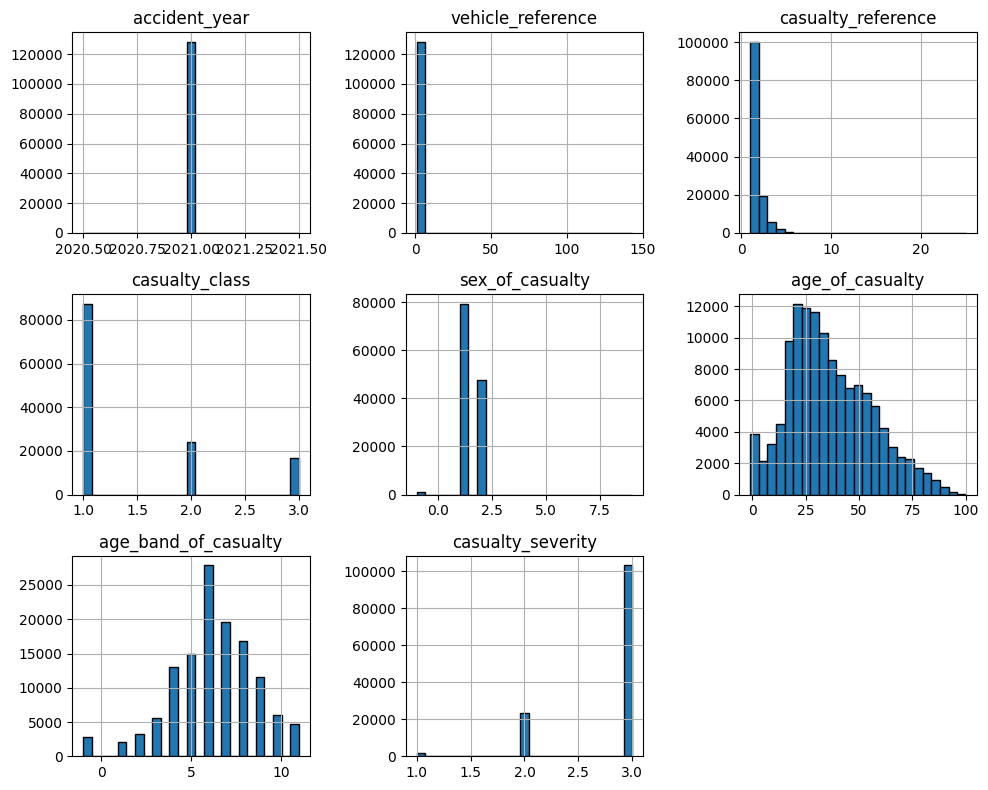

In [48]:
CAS_DF.hist(bins=25, figsize=(10, 8), edgecolor= 'black')
plt.tight_layout();

In [50]:
CAS_DF

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,lsoa_of_casualty
0,2021010000000.0,2021,10287148,1,1,1,1,19,4,3,E01023551
1,2021010000000.0,2021,10287149,1,1,2,1,25,5,3,E01003955
2,2021010000000.0,2021,10287149,2,2,1,1,21,5,3,E01004202
3,2021010000000.0,2021,10287149,2,3,2,1,17,4,2,E01004295
4,2021010000000.0,2021,10287151,1,1,1,1,27,6,3,E01002056
...,...,...,...,...,...,...,...,...,...,...,...
128204,2.02199E+12,2021,991196607,1,1,1,1,38,7,3,-1
128205,2.02199E+12,2021,991196607,2,2,1,1,61,9,3,-1
128206,2.02199E+12,2021,991197944,1,1,2,2,11,3,3,-1
128207,2.02199E+12,2021,991200639,1,1,3,2,34,6,3,-1


In [141]:
# Checking what's inside each column again to know exactly what we want to delete next 
# based on the missing values or unknown data.


#CAS_DF.sex_of_casualty.value_counts()
# -1 = 1004 missing data
# 9 = 5 unknown (self-reported)

#CAS_DF.age_of_casualty.value_counts()
# -1 = 0 missing data

#CAS_DF.age_band_of_casualty.value_counts()
# -1 = 2758 missing data

20     3204
30     3162
19     3079
21     3078
18     3018
       ... 
96       12
98        7
97        7
100       4
99        2
Name: age_of_casualty, Length: 101, dtype: int64

In [27]:
dv = [-1, 9]
CAS_DF = CAS_DF[CAS_DF.sex_of_casualty.isin(dv) ==  False]

In [28]:
CAS_DF = CAS_DF[CAS_DF.age_of_casualty !=  -1]

CAS_DF = CAS_DF[CAS_DF.age_band_of_casualty !=  -1]

In [ ]:
CAS_DF

In [29]:
# Casualty class

def cas_class(classes):
    if classes == 1:
        return "Driver or rider"
    if classes == 2:
        return "Passenger"
    if classes == 3:
        return "Pedestrian"


CAS_DF['casualty_class'] = CAS_DF['casualty_class'].apply(cas_class)

In [30]:
# Sex of casualty

def casualty_sex(gender):
    if gender == 1:
        return "Male"
    if gender == 2:
        return "Female"
    else:
        return "Unknown"


CAS_DF['sex_of_casualty'] = CAS_DF['sex_of_casualty'].apply(casualty_sex)

In [31]:
# Casualty severity

def cas_severity(severity):
    if severity == 1:
        return "Fatal"
    if severity == 2:
        return "Serious"
    if severity == 3:
        return "Slight"


CAS_DF['casualty_severity'] = CAS_DF['casualty_severity'].apply(cas_severity)

In [32]:
CAS_DF

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,lsoa_of_casualty
0,2021010000000.0,2021,10287148,1,1,Driver or rider,Male,19,4,Slight,E01023551
1,2021010000000.0,2021,10287149,1,1,Passenger,Male,25,5,Slight,E01003955
2,2021010000000.0,2021,10287149,2,2,Driver or rider,Male,21,5,Slight,E01004202
3,2021010000000.0,2021,10287149,2,3,Passenger,Male,17,4,Serious,E01004295
4,2021010000000.0,2021,10287151,1,1,Driver or rider,Male,27,6,Slight,E01002056
...,...,...,...,...,...,...,...,...,...,...,...
128204,2.02199E+12,2021,991196607,1,1,Driver or rider,Male,38,7,Slight,-1
128205,2.02199E+12,2021,991196607,2,2,Driver or rider,Male,61,9,Slight,-1
128206,2.02199E+12,2021,991197944,1,1,Passenger,Female,11,3,Slight,-1
128207,2.02199E+12,2021,991200639,1,1,Pedestrian,Female,34,6,Slight,-1


In [33]:
CAS_DF.to_csv('casualty_cleaned_data.csv')

In [ ]:
CAS_DF.to_excel('casualty_cleaned_data.xlsx')

## ACCIDENT DATA

In [34]:
ACC_DF= pd.read_csv('accident-dft-road-casualty-statistics-2021.csv')
ACC_DF

C:\Users\User\AppData\Local\Temp\ipykernel_1172\1662517305.py:1: DtypeWarning: Columns (0,2,35) have mixed types. Specify dtype option on import or set low_memory=False.
  ACC_DF= pd.read_csv('accident-dft-road-casualty-statistics-2021.csv')


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2021010000000.0,2021,10287148,521508.0,193079.0,-0.246102,51.623425,1,3,3,...,0,4,7,4,1,0,1,1,2,E01000263
1,2021010000000.0,2021,10287149,535379.0,180783.0,-0.050574,51.509767,1,2,2,...,5,4,1,1,0,0,1,1,2,E01004303
2,2021010000000.0,2021,10287151,529701.0,170398.0,-0.136152,51.417769,1,2,2,...,5,4,1,1,0,0,1,1,2,E01003146
3,2021010000000.0,2021,10287155,525312.0,178385.0,-0.196411,51.490536,1,1,1,...,4,4,1,1,0,0,1,1,2,E01002847
4,2021010000000.0,2021,10287157,512144.0,171526.0,-0.388169,51.431649,1,3,4,...,0,4,1,1,0,0,1,1,2,E01002608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101082,2021990000000.0,2021,991196247,325546.0,674548.0,-3.194076,55.958152,99,3,2,...,0,1,1,1,0,0,1,1,-1,-1
101083,2021990000000.0,2021,991196607,271195.0,558271.0,-4.010304,54.902512,99,3,2,...,0,6,1,1,0,0,2,1,-1,-1
101084,2021990000000.0,2021,991197944,357297.0,860768.0,-2.716825,57.634805,99,3,1,...,0,1,1,1,0,0,2,1,-1,-1
101085,2021990000000.0,2021,991200639,326936.0,675925.0,-3.172192,55.970735,99,3,1,...,5,1,9,1,0,0,1,2,-1,-1


In [74]:
ACC_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101087 entries, 0 to 101086
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               101087 non-null  object 
 1   accident_year                                101087 non-null  int64  
 2   accident_reference                           101087 non-null  object 
 3   location_easting_osgr                        101070 non-null  float64
 4   location_northing_osgr                       101070 non-null  float64
 5   longitude                                    101070 non-null  float64
 6   latitude                                     101070 non-null  float64
 7   police_force                                 101087 non-null  int64  
 8   accident_severity                            101087 non-null  int64  
 9   number_of_vehicles                           101087 non-nul

In [35]:
ACC_DF = ACC_DF.drop(columns=['local_authority_district', 'local_authority_highway', 'first_road_number',
'junction_control', 'second_road_class', 'second_road_number', 'pedestrian_crossing_human_control',
'pedestrian_crossing_physical_facilities', 'special_conditions_at_site', 'carriageway_hazards', 'trunk_road_flag',
'longitude', 'latitude', 'junction_detail', 'location_easting_osgr','location_northing_osgr'])

ACC_DF

,accident_index,accident_year,accident_reference,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_ons_district,first_road_class,road_type,speed_limit,light_conditions,weather_conditions,road_surface_conditions,urban_or_rural_area,did_police_officer_attend_scene_of_accident,lsoa_of_accident_location
0,2021010000000.0,2021,10287148,1,3,3,1,01/01/2021,6,02:05,E09000003,6,6,30,4,7,4,1,1,E01000263
1,2021010000000.0,2021,10287149,1,2,2,3,01/01/2021,6,03:30,E09000030,3,3,30,4,1,1,1,1,E01004303
2,2021010000000.0,2021,10287151,1,2,2,4,01/01/2021,6,04:07,E09000022,4,6,30,4,1,1,1,1,E01003146
3,2021010000000.0,2021,10287155,1,1,1,1,01/01/2021,6,04:26,E09000020,3,2,30,4,1,1,1,1,E01002847
4,2021010000000.0,2021,10287157,1,3,4,1,01/01/2021,6,03:10,E09000018,5,6,20,4,1,1,1,1,E01002608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101082,2021990000000.0,2021,991196247,99,3,2,1,22/09/2021,4,09:05,S12000036,6,6,20,1,1,1,1,1,-1
101083,2021990000000.0,2021,991196607,99,3,2,2,11/09/2021,7,21:15,S12000006,3,6,60,6,1,1,2,1,-1
101084,2021990000000.0,2021,991197944,99,3,1,1,17/04/2021,7,14:30,S12000034,4,6,60,1,1,1,2,1,-1
101085,2021990000000.0,2021,991200639,99,3,1,1,17/09/2021,6,17:00,S12000036,3,9,20,1,9,1,1,2,-1


In [37]:
# Checking how many NaN values each column contains.

missing_val3= ACC_DF.isnull().sum().sort_values(ascending=False)
percent_missing3 = ((missing_val3/ACC_DF.isnull().count())*100).sort_values(ascending=False)
missing_df3 = pd.concat([missing_val3,percent_missing3], axis=1, keys=['Total', '%'],sort=False)
missing_df3[missing_df3['Total']>=1]

,Total,%


In [38]:
n_duplicates3 =ACC_DF.drop(labels=["accident_index"], axis=1).duplicated().sum()
print(f"You might have {n_duplicates3} duplicates in your database.")

You might have 0 duplicates in your database.


In [84]:
ACC_DF

,accident_index,accident_year,accident_reference,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_ons_district,first_road_class,road_type,speed_limit,light_conditions,weather_conditions,road_surface_conditions,urban_or_rural_area,did_police_officer_attend_scene_of_accident,lsoa_of_accident_location
0,2021010000000.0,2021,10287148,1,3,3,1,01/01/2021,6,02:05,E09000003,6,6,30,4,7,4,1,1,E01000263
1,2021010000000.0,2021,10287149,1,2,2,3,01/01/2021,6,03:30,E09000030,3,3,30,4,1,1,1,1,E01004303
2,2021010000000.0,2021,10287151,1,2,2,4,01/01/2021,6,04:07,E09000022,4,6,30,4,1,1,1,1,E01003146
3,2021010000000.0,2021,10287155,1,1,1,1,01/01/2021,6,04:26,E09000020,3,2,30,4,1,1,1,1,E01002847
4,2021010000000.0,2021,10287157,1,3,4,1,01/01/2021,6,03:10,E09000018,5,6,20,4,1,1,1,1,E01002608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101082,2021990000000.0,2021,991196247,99,3,2,1,22/09/2021,4,09:05,S12000036,6,6,20,1,1,1,1,1,-1
101083,2021990000000.0,2021,991196607,99,3,2,2,11/09/2021,7,21:15,S12000006,3,6,60,6,1,1,2,1,-1
101084,2021990000000.0,2021,991197944,99,3,1,1,17/04/2021,7,14:30,S12000034,4,6,60,1,1,1,2,1,-1
101085,2021990000000.0,2021,991200639,99,3,1,1,17/09/2021,6,17:00,S12000036,3,9,20,1,9,1,1,2,-1


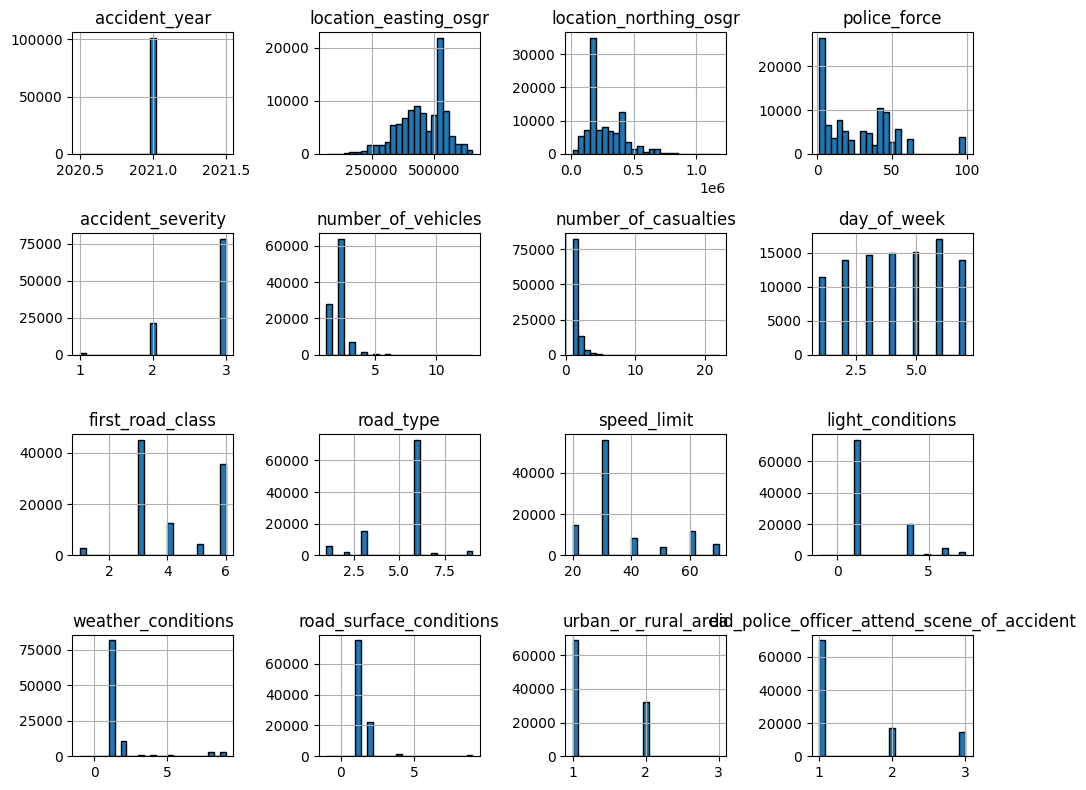

In [78]:
ACC_DF.hist(bins=25, figsize=(10, 8), edgecolor= 'black')
plt.tight_layout();

In [ ]:
# Checking what's inside each column again to know exactly what we want to delete next 
# based on the missing values or unknown data.


#ACC_DF.first_road_class.value_counts()
# 6 = 35596 unclassified

#ACC_DF.road_type.value_counts()
# -1 = 0 missing data
# 9 = 2607 unknown

#ACC_DF.speed_limit.value_counts()
# -1 = 0 missing data
# 99 = 0 unknown

#ACC_DF.light_conditions.value_counts()
# -1 = 11 missing data

#ACC_DF.weather_conditions.value_counts()
# 8 = 3213 other
# 9 = 2746 unknown
# -1 = 12 missing data

#ACC_DF.road_surface_conditions.value_counts()
# 9 = 1024 unknown
# -1 = 431 missing data

#ACC_DF.urban_or_rural_area.value_counts()
# -1 = 0 missing data

#ACC_DF.did_police_officer_attend_scene_of_accident.value_counts()
# -1 = 0 missing data

#ACC_DF.police_force.value_counts()
# 91 = 0 Northern
# 92 = 0 Grampian
# 93 = 0 Tayside
# 94 = 0 Fife
# 95 = 0 Lothian and Borders
# 96 = 0 Central
# 97 = 0 Strathclyde
# 98 = 0 Dumfries ad Galloway
# 99 = 0 Police Scotland
# These are negative because they are a category discontinued in 2019. If they somehow appear in our
# data, we clearly do not want them.

In [39]:
dv = [-1, 9]
ACC_DF = ACC_DF[ACC_DF.road_type.isin(dv) ==  False]

In [40]:
dv = [-1, 9]
ACC_DF = ACC_DF[ACC_DF.road_surface_conditions.isin(dv) == False]

In [41]:
dv = [91, 92, 93, 94, 95, 96, 97, 98, 99]
ACC_DF = ACC_DF[ACC_DF.police_force.isin(dv) == False]

In [42]:
dv = [-1, 99]
ACC_DF = ACC_DF[ACC_DF.speed_limit.isin(dv) == False]

In [43]:
dv = [-1, 8, 9]
ACC_DF = ACC_DF[ACC_DF.weather_conditions.isin(dv) == False]

In [44]:
ACC_DF = ACC_DF[ACC_DF.first_road_class !=  6]

ACC_DF = ACC_DF[ACC_DF.light_conditions !=  -1]

ACC_DF = ACC_DF[ACC_DF.urban_or_rural_area !=  -1]

ACC_DF = ACC_DF[ACC_DF.did_police_officer_attend_scene_of_accident !=  -1]


In [58]:
ACC_DF

,accident_index,accident_year,accident_reference,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_ons_district,first_road_class,road_type,speed_limit,light_conditions,weather_conditions,road_surface_conditions,urban_or_rural_area,did_police_officer_attend_scene_of_accident,lsoa_of_accident_location
1,2021010000000.0,2021,10287149,1,2,2,3,01/01/2021,Fri,03:30,E09000030,3,3,30,"Darkness, lights lit","Fine, no high winds",Dry,Urban,Y,E01004303
2,2021010000000.0,2021,10287151,1,2,2,4,01/01/2021,Fri,04:07,E09000022,4,6,30,"Darkness, lights lit","Fine, no high winds",Dry,Urban,Y,E01003146
3,2021010000000.0,2021,10287155,1,1,1,1,01/01/2021,Fri,04:26,E09000020,3,2,30,"Darkness, lights lit","Fine, no high winds",Dry,Urban,Y,E01002847
4,2021010000000.0,2021,10287157,1,3,4,1,01/01/2021,Fri,03:10,E09000018,5,6,20,"Darkness, lights lit","Fine, no high winds",Dry,Urban,Y,E01002608
5,2021010000000.0,2021,10287163,1,2,2,1,01/01/2021,Fri,04:10,E09000030,4,3,20,"Darkness, lights lit","Fine, no high winds",Dry,Urban,Y,E01004228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97180,202163DF00621,2021,63DF00621,63,1,2,2,25/04/2021,Sun,18:36,W06000023,3,6,60,Daylight,"Fine, no high winds",Dry,Rural,Y,W01000483
97181,202163DF00921,2021,63DF00921,63,1,4,1,31/05/2021,Mon,14:00,W06000023,4,6,60,Daylight,"Fine, no high winds",Dry,Rural,Y,W01000450
97182,202163DF01621,2021,63DF01621,63,1,1,1,16/09/2021,Thu,22:15,W06000023,4,6,60,"Darkness, no lighting","Fine, no high winds",Dry,Rural,N,W01000433
97183,202163DF01721,2021,63DF01721,63,1,3,3,05/10/2021,Tue,08:00,W06000023,3,6,60,Daylight,"Raining, no high winds",Wet/Damp,Rural,Y,W01000444


In [45]:
ACC_DF.local_authority_ons_district.value_counts()

E08000025    1052
E09000022     843
E09000033     808
E09000030     806
E09000032     725
             ... 
E07000199      21
E07000135      20
E07000191      20
E07000027      13
EHEATHROW       1
Name: local_authority_ons_district, Length: 346, dtype: int64

In [46]:
counts = ACC_DF['police_force'].value_counts()

remove = counts[counts <= 500].index
ACC_DF = ACC_DF[~ACC_DF.police_force.isin(remove)]

In [47]:
counts = ACC_DF['local_authority_ons_district'].value_counts()

remove = counts[counts <= 200].index
ACC_DF = ACC_DF[~ACC_DF.local_authority_ons_district.isin(remove)]

In [48]:
counts = ACC_DF['weather_conditions'].value_counts()

remove = counts[counts <= 100].index
ACC_DF = ACC_DF[~ACC_DF.weather_conditions.isin(remove)]

In [49]:
counts = ACC_DF['road_surface_conditions'].value_counts()

remove = counts[counts <= 100].index
ACC_DF = ACC_DF[~ACC_DF.road_surface_conditions.isin(remove)]

In [50]:
# Accident severity

def cas_class(classes):
    if classes == 1:
        return "Driver or rider"
    if classes == 2:
        return "Passenger"
    if classes == 3:
        return "Pedestrian"


CAS_DF['casualty_class'] = CAS_DF['casualty_class'].apply(cas_class)

In [51]:
# Day of the week

def week_day(day):
    if day == 1:
        return "Sun"
    if day == 2:
        return "Mon"
    if day == 3:
        return "Tue"
    if day == 4:
        return "Wed"
    if day == 5:
        return "Thu"
    if day == 6:
        return "Fri"
    if day == 7:
        return "Sat"
    else:
        return "Unknown"


ACC_DF['day_of_week'] = ACC_DF['day_of_week'].apply(week_day)

In [52]:
# Light conditions

def light_condition(light):
    if light == 1:
        return "Daylight"
    if light == 4:
        return "Darkness, lights lit"
    if light == 5:
        return "Darkness, lights unlit"
    if light == 6:
        return "Darkness, no lighting"
    if light == 7:
        return "Darkness, lighting unknown"
    else:
        return "Unknown"


ACC_DF['light_conditions'] = ACC_DF['light_conditions'].apply(light_condition)

In [53]:
# Weather conditions

def weather_condition(weather):
    if weather == 1:
        return "Fine, no high winds"
    if weather == 2:
        return "Raining, no high winds"
    if weather == 3:
        return "Snowing, no high winds"
    if weather == 4:
        return "Fine, high winds"
    if weather == 5:
        return "Raining, high winds"
    if weather == 6:
        return "Snowing, high winds"
    if weather == 7:
        return "Fog/Mist"
    else:
        return "Unknown"


ACC_DF['weather_conditions'] = ACC_DF['weather_conditions'].apply(weather_condition)

In [54]:
# Road surface conditions
def surface_condition(surface):
    if surface == 1:
        return "Dry"
    if surface == 2:
        return "Wet/Damp"
    if surface == 3:
        return "Snow"
    if surface == 4:
        return "Frost/Ice"
    if surface == 5:
        return "Flood (3cm >)"
    if surface == 6:
        return "Oil/Diesel"
    if surface == 7:
        return "Mud"
    else:
        return "Unknown"


ACC_DF['road_surface_conditions'] = ACC_DF['road_surface_conditions'].apply(surface_condition)

In [55]:
# Urban or rural area

def urban_or_rural(type):
    if type == 1:
        return "Urban"
    if type == 2:
        return "Rural"
    else:
        return "Unallocated"


ACC_DF['urban_or_rural_area'] = ACC_DF['urban_or_rural_area'].apply(urban_or_rural)

In [56]:
# Did police attend

def police_attend(attend):
    if attend == 1:
        return "Y"
    if attend == 2:
        return "N"
    if attend == 3:
        return "N - reported with self-complete report"
    else:
        return "Unknown"


ACC_DF['did_police_officer_attend_scene_of_accident'] = ACC_DF['did_police_officer_attend_scene_of_accident'].apply(police_attend)    

In [107]:
ACC_DF

,accident_index,accident_year,accident_reference,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_ons_district,first_road_class,road_type,speed_limit,light_conditions,weather_conditions,road_surface_conditions,urban_or_rural_area,did_police_officer_attend_scene_of_accident,lsoa_of_accident_location
1,2021010000000.0,2021,10287149,1,2,2,3,01/01/2021,Fri,03:30,E09000030,3,3,30,"Darkness, lights lit","Fine, no high winds",Dry,Urban,Y,E01004303
2,2021010000000.0,2021,10287151,1,2,2,4,01/01/2021,Fri,04:07,E09000022,4,6,30,"Darkness, lights lit","Fine, no high winds",Dry,Urban,Y,E01003146
3,2021010000000.0,2021,10287155,1,1,1,1,01/01/2021,Fri,04:26,E09000020,3,2,30,"Darkness, lights lit","Fine, no high winds",Dry,Urban,Y,E01002847
4,2021010000000.0,2021,10287157,1,3,4,1,01/01/2021,Fri,03:10,E09000018,5,6,20,"Darkness, lights lit","Fine, no high winds",Dry,Urban,Y,E01002608
5,2021010000000.0,2021,10287163,1,2,2,1,01/01/2021,Fri,04:10,E09000030,4,3,20,"Darkness, lights lit","Fine, no high winds",Dry,Urban,Y,E01004228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97180,202163DF00621,2021,63DF00621,63,1,2,2,25/04/2021,Sun,18:36,W06000023,3,6,60,Daylight,"Fine, no high winds",Dry,Rural,Y,W01000483
97181,202163DF00921,2021,63DF00921,63,1,4,1,31/05/2021,Mon,14:00,W06000023,4,6,60,Daylight,"Fine, no high winds",Dry,Rural,Y,W01000450
97182,202163DF01621,2021,63DF01621,63,1,1,1,16/09/2021,Thu,22:15,W06000023,4,6,60,"Darkness, no lighting","Fine, no high winds",Dry,Rural,N,W01000433
97183,202163DF01721,2021,63DF01721,63,1,3,3,05/10/2021,Tue,08:00,W06000023,3,6,60,Daylight,"Raining, no high winds",Wet/Damp,Rural,Y,W01000444


In [57]:
ACC_DF.to_csv('accident_cleaned_data.csv')

Furthermore, here are some things from the data decoding to know:

#### VEHICLE
Vehicle data can be linked to casualty data via vehicle_reference.

#### ACCIDENT DATA
Accident_index uses an unique value that combines the accident_year and the accident_ref to form an unique ID. It can be used to join vehicle and casualty data.

The datasets are still big, which is because the rows are so long. We need to further reduce the dataset down to maybe 10k ~ 20k rows at most.